## Bring in libraries and dataframes and set indexes

In [200]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Get Experiment index
Layout = pd.read_excel('K:\CPDiary\Data\BaxtersMVI\TrialLayout.xlsx',index_col='Plot')

#Set up index for Low Zone
LowWHCZoneIndex = pd.read_excel('K:\CPDiary\Data\BaxtersMVI\LoggedData\IndexFiles\BaxtersLowWHCZone.xlsx', index_col=0)
LowWHCZoneIndex.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in LowWHCZoneIndex.Plot]
LowWHCZoneIndex.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in LowWHCZoneIndex.Plot]
LowWHCZoneIndex.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in LowWHCZoneIndex.Plot]
#Get Data for Mid Zone
LowWHCZoneData=pd.read_csv('K:\CPDiary\Data\BaxtersMVI\TestData\MockBaxtersLowWHCZone.dat', skiprows = [0,2,3], index_col = 0)
#join Data with index
LowWHCZoneDataTransposed = LowWHCZoneData.transpose()
LowWHCZoneMerged = pd.concat([LowWHCZoneIndex,LowWHCZoneDataTransposed],axis=1)
#Set up indexing and data frames
LowWHCZoneMerged.index.name = 'ColumnHeader'
LowWHCZoneMerged.set_index(['Measurement','Zone','Irrig','Rep'],inplace=True,drop=False)
LowWHCZoneAll = LowWHCZoneMerged.transpose()
LowWHCZoneTs = LowWHCZoneAll.ix[7:,LowWHCZoneAll.ix['Measurement',:]=='IR_SurfaceTemp'].copy()
LowWHCZoneTs.columns = LowWHCZoneTs.columns.droplevel(0)

#Set up index for Mid Zone
MidWHCZoneIndex = pd.read_excel('K:\CPDiary\Data\BaxtersMVI\LoggedData\IndexFiles\BaxtersMidWHCZone.xlsx', index_col=0)
MidWHCZoneIndex.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in MidWHCZoneIndex.Plot]
MidWHCZoneIndex.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in MidWHCZoneIndex.Plot]
MidWHCZoneIndex.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in MidWHCZoneIndex.Plot]
#Get Data for Mid Zone
MidWHCZoneData=pd.read_csv('K:\CPDiary\Data\BaxtersMVI\TestData\MockBaxtersMidWHCZone.dat', skiprows = [0,2,3], index_col = 0)
#join Data with index
MidWHCZoneDataTransposed = MidWHCZoneData.transpose()
MidWHCZoneMerged = pd.concat([MidWHCZoneIndex,MidWHCZoneDataTransposed],axis=1)
#Set up indexing and data frames
MidWHCZoneMerged.index.name = 'ColumnHeader'
MidWHCZoneMerged.set_index(['Measurement','Zone','Irrig','Rep'],inplace=True,drop=False)
MidWHCZoneAll = MidWHCZoneMerged.transpose()
#MidWHCZoneAll.index = MidWHCZoneAll.index.to_datetime()
MetData = MidWHCZoneAll.ix[7:,['AirTemp','RelativeHumidity','RadnMJ','RadnW','Rain','Wind']].copy()
MetData.columns = MetData.columns.droplevel([1,2,3])
MidWHCZoneTs = MidWHCZoneAll.ix[7:,MidWHCZoneAll.ix['Measurement',:]=='IR_SurfaceTemp'].copy()
MidWHCZoneTs.columns = MidWHCZoneTs.columns.droplevel(0)

#Set up index for High Zone
HighWHCZoneIndex = pd.read_excel('K:\CPDiary\Data\BaxtersMVI\LoggedData\IndexFiles\BaxtersHighWHCZone.xlsx', index_col=0)
HighWHCZoneIndex.ix[:,'Zone'] = [Layout.ix[x,'Zone'] for x in HighWHCZoneIndex.Plot]
HighWHCZoneIndex.ix[:,'Irrig'] = [Layout.ix[x,'Irrig'] for x in HighWHCZoneIndex.Plot]
HighWHCZoneIndex.ix[:,'Rep'] = [Layout.ix[x,'Rep'] for x in HighWHCZoneIndex.Plot]
#Get Data for Mid Zone
HighWHCZoneData=pd.read_csv('K:\CPDiary\Data\BaxtersMVI\TestData\MockBaxtersHighWHCZone.dat', skiprows = [0,2,3], index_col = 0)
#join Data with index
HighWHCZoneDataTransposed = HighWHCZoneData.transpose()
HighWHCZoneMerged = pd.concat([HighWHCZoneIndex,HighWHCZoneDataTransposed],axis=1)
#Set up indexing and data frames
HighWHCZoneMerged.index.name = 'ColumnHeader'
HighWHCZoneMerged.set_index(['Measurement','Zone','Irrig','Rep'],inplace=True,drop=False)
HighWHCZoneAll = HighWHCZoneMerged.transpose()
HighWHCZoneTs = HighWHCZoneAll.ix[7:,HighWHCZoneAll.ix['Measurement',:]=='IR_SurfaceTemp'].copy()
HighWHCZoneTs.columns = HighWHCZoneTs.columns.droplevel(0)

#Join everything together and get the formats all right
Zones = ['Low','Mid','High']
Irrigs = ['STD','VRI']
Reps = [1,2,3,4]
ExptIndex = pd.MultiIndex.from_product([Zones, Irrigs, Reps], names = ['Zone', 'Irrig', 'Rep'])
SurfaceTemp = pd.DataFrame(index = LowWHCZoneTs.index, columns = ExptIndex)
SurfaceTemp.update(LowWHCZoneTs)
SurfaceTemp.update(MidWHCZoneTs)
SurfaceTemp.update(HighWHCZoneTs)
SurfaceTemp.index = SurfaceTemp.index.to_datetime()
for plot in SurfaceTemp.columns:
    SurfaceTemp.ix[:,plot] = pd.to_numeric(SurfaceTemp.ix[:,plot])
HourlySurfaceTemp = SurfaceTemp.resample('H').mean()
SurfaceTempMeans = HourlySurfaceTemp.groupby(level=['Zone','Irrig'],axis=1).mean()

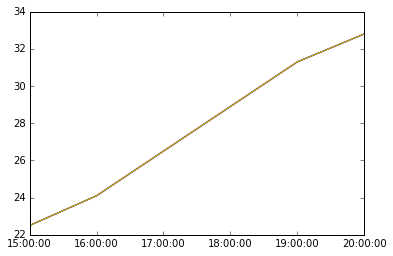

In [201]:
for zone in Zones:
    for irrig in Irrigs:
        plt.plot(SurfaceTempMeans.ix[:,(zone,irrig)])


In [199]:
HourlySurfaceTemp

Zone                  Low                                             Mid  \
Irrig                 STD                     VRI                     STD   
Rep                     1     2     3     4     1     2     3     4     1   
2015-10-15 15:00:00  22.5  22.5  22.5  22.5  22.5  22.5  22.5  22.5  22.5   
2015-10-15 16:00:00  24.1  24.1  24.1  24.1  24.1  24.1  24.1  24.1  24.1   
2015-10-15 17:00:00  26.5  26.5  26.5  26.5  26.5  26.5  26.5  26.5  26.5   
2015-10-15 18:00:00  28.9  28.9  28.9  28.9  28.9  28.9  28.9  28.9  28.9   
2015-10-15 19:00:00  31.3  31.3  31.3  31.3  31.3  31.3  31.3  31.3  31.3   
2015-10-15 20:00:00  32.8  32.8  32.8  32.8  32.8  32.8  32.8  32.8  32.8   

Zone                       ...               High                          \
Irrig                      ...    VRI         STD                     VRI   
Rep                     2  ...      3     4     1     2     3     4     1   
2015-10-15 15:00:00  22.5  ...   22.5  22.5  22.5  22.5  22.5  22.5  22.5   
2015-10-15 16:00:00  24.1  ...   24.1  24.1  24.1  24.1  24.1  24.1  24.1   
2015-10-15 17:00:00  26.5  ...   26.5  26.5  26.5  26.5  26.5  26.5  26.5   
2015-10-15 18:00:00  28.9  ...   28.9  28.9  28.9  28.9  28.9  28.9  28.9   
2015-10-15 19:00:00  31.3  ...   31.3  31.3  31.3  31.3  31.3  31.3  31.3   
2015-10-15 20:00:00  32.8  ...   32.8  32.8  32.8  32.8  32.8  32.8  32.8   

Zone                                   
Irrig                                  
Rep                     2     3     4  
2015-10-15 15:00:00  22.5  22.5  22.5  
2015-10-15 16:00:00  24.1  24.1  24.1  
2015-10-15 17:00:00  26.5  26.5  26.5  
2015-10-15 18:00:00  28.9  28.9  28.9  
2015-10-15 19:00:00  31.3  31.3  31.3  
2015-10-15 20:00:00  32.8  32.8  32.8  

[6 rows x 24 columns]